## Need to import the Morse class

In [1]:
from src.morse import Morse

## Initialize Morse class

In [2]:
data = Morse()

##  Load ply file into the Morse class
Use the function: **.load_mesh_ply(filename, quality_index, inverted=False)**

- **filename:** The path to the ply file you want to load
- **quality_index:** The position index where the Morse function value are saved in the ply file (e.g. 3 if you want the quality value and the plyfile has the properties x,y,z,quality; or if you want to take the height function/z-value: choose 2)
- **inverted:** Optional, default is false. Multiplies the Morse function with -1 -> min will become max and max will become min.

In [3]:
#file = "../../Data/vase_reduced_cleaned.ply"
file = "../../Data/artefact_31_test/curvature/31_r1.00_n4_v256.volume.ply"
#file = "../../Data/graz/steinbruchwand_ttvc_gmo_2022-11-05_0934/Steinbruchwand_TTVC_GMO_cut_150x200_r15.00_n4_v256.volume.ply"
data.load_mesh_ply(file, quality_index=3, inverted=True)

Time read data file: 3.412789898000483
Time read and prepare data: 13.915800062000926


## Dataset info (Optional)
Prints out info like Vertices, Edges and Faces, as well as the Morse function range

In [4]:
data.info()

+-------------------------------------------------------
| Mesh Info
+-------------------------------------------------------
| Filename:  ../../Data/artefact_31_test/curvature/31_r1.00_n4_v256.volume
| Morse function values range:  [-0.6180446147918701, 0.5752757787704468]
+-------------------------------------------------------
| Number of Vertices:  146174
| Number of Edges:  438516
| Number of Faces:  292344
+-------------------------------------------------------
| Euler characteristic:  2
+-------------------------------------------------------


## Perform Morse Complex Calculations
Use the functions **.ProcessLowerStars()** and **.ExtractMorseComplex()**
- **ProcessLowerStars()** calculates the discrete vector field
- **ExtractMorseComplex()** calculates the Morse complex, so finds the neighborhood relations between critical simplices by finding separatrices from maxima to saddles and from saddles to minima

In [5]:
data.ProcessLowerStars()
data.ExtractMorseComplex()

Time ProcessLowerStar: 2.802698997002153
Time ExtractMorseComplex and Separatrices: 3.362744746002136


In [6]:
data.calculate_BettiNumbers()

Time Betti numbers: 5.043865971998457
Betti Numbers:  [1. 0. 1.]


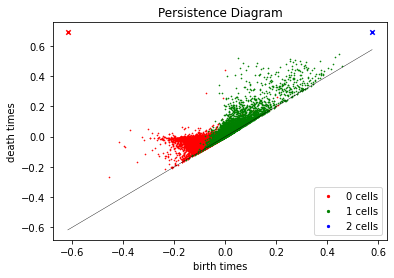

In [7]:
data.plot_PersistenceDiagram()

In [8]:
data.calculate_BettiNumbers(0.04)

Need to reduce to this persistence first...
Time cancel critical points with  0.04  persistence:  2.4167102900028112
Time Betti numbers: 0.15447344000131125
Betti Numbers:  [1. 0. 1.]


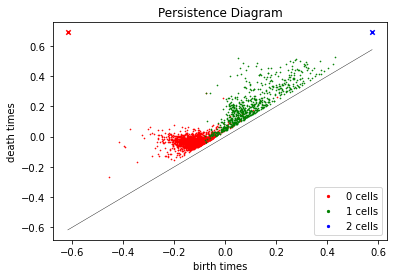

In [9]:
data.plot_PersistenceDiagram(0.04)

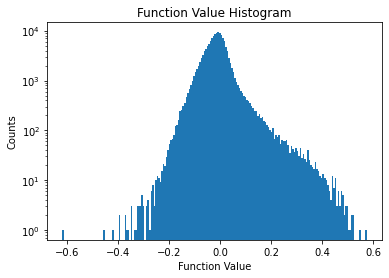

In [10]:
stats = data.funval_statistics(nb_bins=200, log=True)

In [11]:
print("Stats all fun vals:")
print(stats['mean'])
print(stats['std'])

Stats all fun vals:
-0.011234303624744106
4.721350343399873e-13


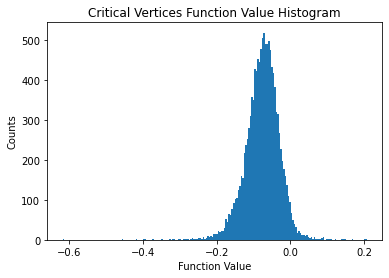

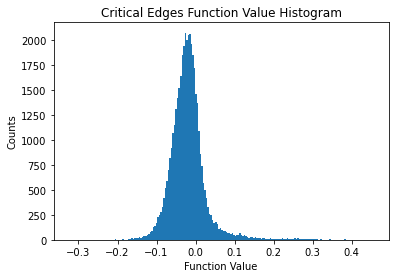

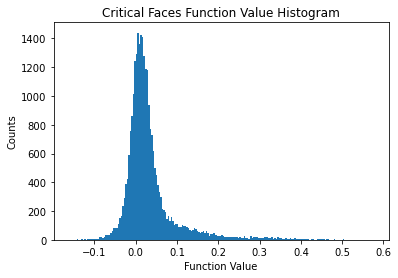

In [12]:
stats2 = data.critical_funval_statistics(0,nb_bins=200)

In [13]:
print("Stats V:")
print(stats2['V']['mean'])
print(stats2['V']['std'])
print("Stats E:")
print(stats2['E']['mean'])
print(stats2['E']['std'])
print("Stats F:")
print(stats2['F']['mean'])
print(stats2['F']['std'])

Stats V:
-0.07593480385260519
8.151084860433065e-15
Stats E:
-0.019297264348525064
1.18526033739705e-13
Stats F:
0.03363071333630723
5.685245101910945e-14


This persistence has already been calculated!
You can access it via .reducedMorseComplexes[persistence] 


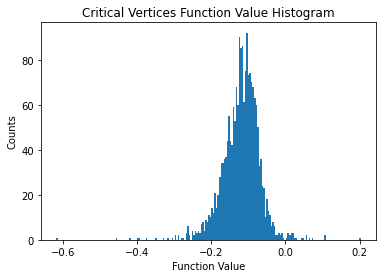

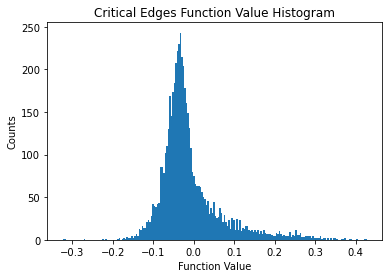

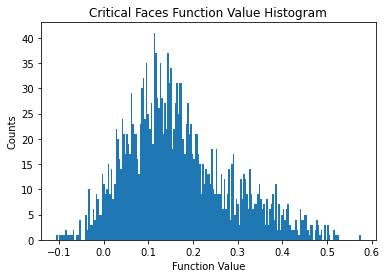

In [14]:
data.ReduceMorseComplex(0.04)
stats3 = data.critical_funval_statistics(0.04,nb_bins=200)

In [15]:
print("Stats V:")
print(stats3['V']['mean'])
print(stats3['V']['std'])
print("Stats E:")
print(stats3['E']['mean'])
print(stats3['E']['std'])
print("Stats F:")
print(stats3['F']['mean'])
print(stats2['F']['std'])

Stats V:
-0.12034166010711621
1.0810888288629887e-16
Stats E:
-0.010015347507135224
3.180405451386103e-15
Stats F:
0.16673640729245573
5.685245101910945e-14


In [16]:
data.ExtractMorseCells(0.04)
data.plot_SalientEdges_ply("../../Data/test_plotting_functions/plot_saledge", 0.06, 0.05)
data.plot_MorseCells_ply(0.04, "../../Data/test_plotting_functions/plot_cells")
data.plot_MorseComplex_ply(0.04, "../../Data/test_plotting_functions/plot_complex")

Have  3  boundary points that could not be labelled in 2 iterations...
Time get MorseCells for  0.04 persistence:  10.043517677000636
Need to maximally reduce MorseComplex first...
Time cancel critical points with  1.193320393562317  persistence:  2.1313007729986566
Persistence was high enough that this complex is maximally reduced.
Time writing salient edge overlay file for maximally reduced MC and threshold 0.05 0.06 :  0.39467441200031317
Time writing Cells overlay file: 0.3647480979998363
Time writing overlay file for MorseComplex with  0.04 :  3.7505675469983544


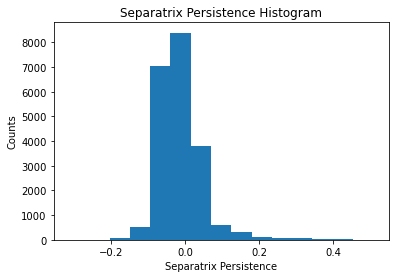

In [17]:
stats = data.salient_edge_statistics()

In [18]:
print("Stats sepa persistence:")
print(stats['mean'])
print(stats['std'])

Stats sepa persistence:
-0.01300434462488483
1.3131289381720732e-13


## Get Morse Complex info (Optional)
Prints out infos on the original Morse complex like number of critical vertices, crit. edges and crit. faces. Persistence should be 0 on the original complex.

In [19]:
data.MorseComplex.info()

+-------------------------------------------------------
| MorseComplex Info
+-------------------------------------------------------
| Filename:  ../../Data/artefact_31_test/curvature/31_r1.00_n4_v256.volume
| Persistence of this Complex:  0
+-------------------------------------------------------
| Number of Vertices:  12199
| Number of Edges:  21079
| Number of Faces:  8882
+-------------------------------------------------------
| Euler characteristic:  2
| Betti numbers:  [1. 0. 1.]
+-------------------------------------------------------


In [20]:
#labelfile_name = "../../Data/vase_cells_only_label" # the .txt extension is written automatically
#labelfile_name = "../../Data/31_only_label" # the .txt extension is written automatically

#data.ExtractMorseCells(0)
#data.write_MorseCellLabels(0, labelfile_name)

## Reduce Morse complex (using Persistence)
Use the function **.ReduceMorseComplex(persistence)**
- **persistence:** The persistence level up to which the Morse complex should be simplified. (neighboring critical simplices will be cancelled, (if topologically possible,) if their Morse function value difference is less than the persistence.

The reduced complex will be stored in a dictionary **data.reducedMorseComplexes[persistence]** which allows to calculate several persistences. Can be accessed using the persistence as key.

In [21]:
#data.ExtractMorseCells(0.04)
filename = "../../Data/31_testnew_segmentation"
seg = data.Segmentation(0.04, 0.06, 0.05, 0.15, minimum_labels=5)
data.plot_Segmentation_label_txt(0.04, 0.06, 0.05, 0.15, filename)

Time Edge Detection for  0.06 - 0.05 threshold: 0.0448865870021109
Time Segmentation:  2.807860223998432
Time writing label txt file: 0.07499984700189088


In [22]:
print(len(seg.Cells.keys()))

17


In [23]:
#labelfile_name = "../../Data/vase_cells_only_label_001" # the .txt extension is written automatically
labelfile_name = "../../Data/31_only_label_004" # the .txt extension is written automatically

#data.ExtractMorseCells(0.04)
#data.write_MorseCellLabels(0.04, labelfile_name)

## Plot option for Gigamesh (there are several also for writing meshlab overlay files..)
Uses a labels for each Morse cell to write a label file which can be read by Gigamesh for visualization.
Need to Extract Morse cells first with **.ExtractMorseCells(persistence)** and than **.write_MorseCellLabels(persistence, filename)** to write the according label file. 
- **persistence:** The persistence of the Morse complex you want to visualize
- **filename:** filename where the label file should be stored

In [24]:
#labelfile_name = "abc_labels" # the .txt extension is written automatically

#data.ExtractMorseCells(3)
#data.write_MorseCellLabels(3, labelfile_name)

## Visualize in Gigamesh:
(Maybe the develop version of gigamesh is required, since import labels migth not be in the website version)
1. Load the ply file into Gigamesh
2. Choose Import labels under **File - Import - Import Labels** and load the written output label file
3. Vertex in first column: YES 
4. Select **Labels-Connected Comp.** on the right to see the Morse cells of the Morse complex